In [1]:
#import packages
#!pip install netcdf4
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
#pad data import
pad_2010 = pd.read_csv('pad_water_quality_2010.csv', delimiter = ',', header = 9)
display(pad_2010)

#pad data index
pad_2010['lon'] = pad_2010['Decimal Degrees.1']
pad_2010['lat'] = pad_2010['Decimal Degrees']
pad_2010['chl'] = pad_2010['ug/L']
pad_2010['temp'] = pad_2010['deg C']

#new dataset with indexed data
pad_2010 = pad_2010[['lon', 'lat','chl', 'temp']]
print(pad_2010)

temp_pad = pad_2010['temp'].values
chl_pad = pad_2010['chl'].values


,Unnamed: 0,YYYMMDD,hh:mm,Decimal Degrees,Decimal Degrees.1,deg C,uS/cm,NTU,ug/L,ug/L.1,mg/L,cm,m/s,m
0,Ath Abv Cec,20100621,12:51,58.44226,-111.37828,20.46,252.5,72.7,14.84,321.34,102.1429,25.0,1.03,3.1
1,Ath Abv Cec,20100621,13:19,58.44348,-111.38070,20.49,252.2,72.8,15.80,320.33,115.7143,25.0,0.95,2.8
2,Ath Abv FC,20100621,14:12,58.45258,-111.08581,20.51,252.5,74.2,15.32,319.07,92.5000,35.0,0.78,4.4
3,Ath Abv FC,20100621,14:21,58.45248,-111.08511,20.50,250.3,63.5,14.63,334.91,90.0000,33.5,0.77,4.7
4,Ath Abv FC,20100621,14:29,58.45261,-111.08594,20.51,250.8,65.2,14.17,333.51,72.8571,31.5,0.80,5.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,QF TM,20100706,11:18,58.73651,-111.41180,17.44,363.5,130.3,9.56,218.64,-9999.0000,15.0,0.74,6.2
173,QF Middle,20100706,11:37,58.78519,-111.45411,18.44,371.1,172.8,10.61,198.39,122.5000,12.0,0.80,4.4
174,QF BM,20100706,12:00,58.83385,-111.56914,18.56,347.0,134.3,11.12,212.80,154.2857,15.0,0.83,4.7
175,QF at Peace,20100706,12:16,58.88858,-111.60782,18.42,347.8,140.6,12.68,206.29,166.0714,17.0,0.77,2.6


           lon       lat    chl   temp
0   -111.37828  58.44226  14.84  20.46
1   -111.38070  58.44348  15.80  20.49
2   -111.08581  58.45258  15.32  20.51
3   -111.08511  58.45248  14.63  20.50
4   -111.08594  58.45261  14.17  20.51
..         ...       ...    ...    ...
172 -111.41180  58.73651   9.56  17.44
173 -111.45411  58.78519  10.61  18.44
174 -111.56914  58.83385  11.12  18.56
175 -111.60782  58.88858  12.68  18.42
176 -111.61662  58.90446   4.39  18.56

[177 rows x 4 columns]


In [3]:
#brazil data import
brazil = pd.read_csv('Field_measurements_Lago_Curuai.csv', delimiter = ',', header = 29)
display(brazil)

#brazil clean data
brazil_clean1 = brazil.loc[brazil['Chlorophyll_a']<1800.0]
brazil_clean2 = brazil.loc[brazil['Date']>20040600]

#brazil index data
lon_brazil = brazil_clean2['Longitude']
lat_brazil = brazil_clean2['Latitude']
temp_brazil = brazil_clean2['Temperature']
chl_brazil = brazil_clean2['Chlorophyll_a']


,Date,Time,Longitude,Latitude,TSS,ISS,OSS,Chlorophyll_a,DIC,DOC,Transparency,Turbidity,Temperature,pH,Conductivity,CO2
0,20030925,10:25,-55.789501,-2.20678,35.3430,28.25000,7.09300,24.4064,17.450,18.820,0.30,123,32.5,6.45,21,607.95
1,20030925,12:07,-55.852402,-2.19675,94.6200,59.34700,35.27300,205.7970,4.764,9.242,0.12,205,34.7,8.37,25,3.29
2,20030925,12:30,-55.823399,-2.17569,49.8880,40.14000,9.74800,47.7484,11.370,8.796,0.20,161,34.5,8.27,33,9.89
3,20030925,12:50,-55.836800,-2.16275,55.7920,41.19600,14.59600,54.1705,10.350,7.447,0.20,210,35.4,8.39,33,6.77
4,20030925,13:40,-55.780701,-2.14625,48.0100,32.81800,15.19200,79.5686,7.092,7.863,0.20,177,35.3,8.80,34,1.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,20040619,13:25,-55.220901,-2.17781,12.4263,6.95750,5.46875,19.5880,14.120,6.348,0.65,28,29.4,7.48,34,75.62
291,20040619,13:55,-55.155899,-2.19958,12.9225,8.09625,4.82625,11.3590,15.100,4.787,0.65,27,29.4,7.55,35,69.45
292,20040619,14:10,-55.155800,-2.22706,11.7656,7.02000,4.74556,12.9470,14.730,6.393,0.60,27,29.3,6.50,35,486.68
293,20040619,14:30,-55.198700,-2.23428,15.7943,5.33714,10.45710,57.0170,11.920,11.730,0.65,27,29.7,8.42,30,7.66


<function matplotlib.pyplot.show(close=None, block=None)>

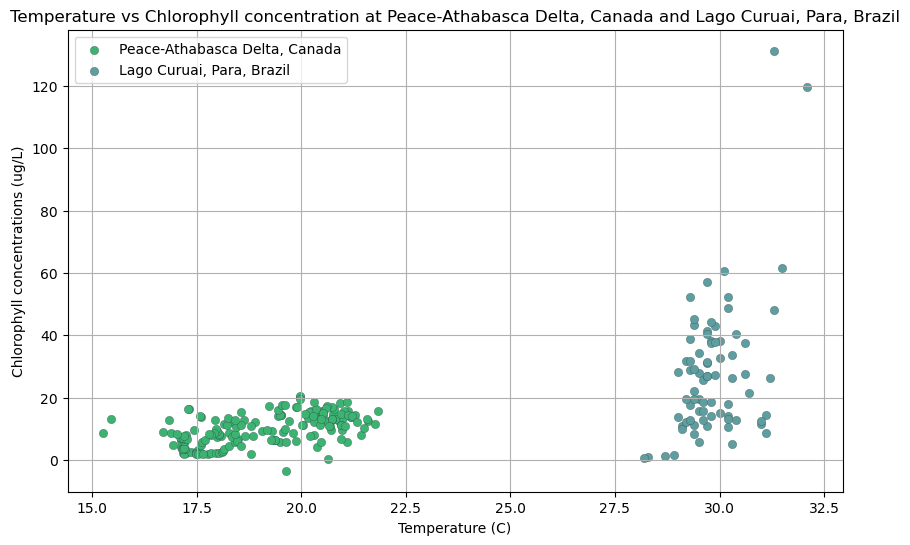

In [4]:
#plot figures
fig,ax =plt.subplots(figsize=(10,6))
ax.plot
ax.set_title('Temperature vs Chlorophyll concentration at Peace-Athabasca Delta, Canada and Lago Curuai, Para, Brazil')
ax.scatter(temp_pad, chl_pad, color='mediumseagreen', label='Peace-Athabasca Delta, Canada', marker= 'o', ls='-', lw= .25, edgecolor= 'darkslategray')
ax.scatter(temp_brazil, chl_brazil, color='cadetblue', label='Lago Curuai, Para, Brazil', marker= 'o', ls='-', lw= .25, edgecolor= 'darkslategray')
ax.set_xlabel('Temperature (C)')
ax.set_ylabel('Chlorophyll concentrations (ug/L)')
ax.legend()
ax.grid()
plt.show

#save graph
#plt.savefig('compare_loc.png')